## Нейронные сети типа перцептрон

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0676
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0083
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010    
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7837e-04
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1139e-04 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9953e-04
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2286e-04
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0706e-04
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8627e-04
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1311e-04 
Epoch 15/1000
16/1

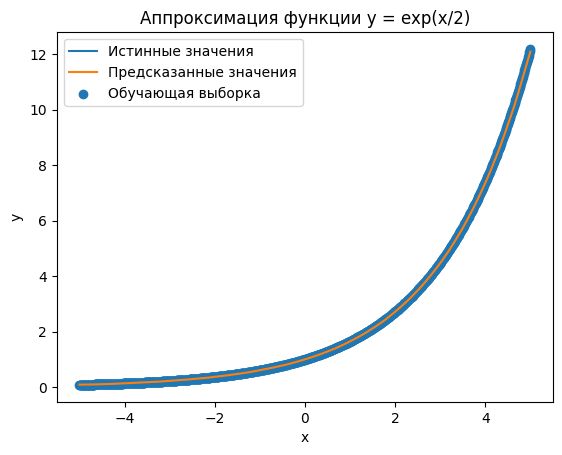

In [2]:
# Генерация данных
# Генерируем 100 точек для обучения в диапазоне от -5 до 5 с равномерным шагом
x_train = np.linspace(-5, 5, 1000)
# Вычисляем соответствующие значения y = exp(x/2) для обучающей выборки
y_train = np.exp(x_train / 2)
x_test = np.linspace(-5, 5, 200)
y_test = np.exp(x_test / 2)

# Нормализация данных (Min-Max): масштабируем данные в диапазон [0, 1]
x_train_norm = (x_train - x_train.min()) / (x_train.max() - x_train.min())
y_train_norm = (y_train - y_train.min()) / (y_train.max() - y_train.min())
x_test_norm = (x_test - x_test.min()) / (x_test.max() - x_test.min())
y_test_norm = (y_test - y_test.min()) / (y_test.max() - y_test.min())

# Преобразуем данные в формат, подходящий для Keras (добавляем дополнительное измерение)
x_train_norm = x_train_norm.reshape(-1, 1)
x_test_norm = x_test_norm.reshape(-1,1)
y_train_norm = y_train_norm.reshape(-1, 1)
y_test_norm = y_test_norm.reshape(-1, 1)

# Создаем последовательную модель Keras
model = keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    # Первый скрытый слой с 64 нейронами и функцией активации ReLU
    keras.layers.Dense(256, activation='relu'),
    # Второй скрытый слой с 32 нейронами и функцией активации ReLU
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    # Выходной слой с 1 нейроном
    keras.layers.Dense(1)
])

# Компилируем модель, выбираем оптимизатор Adam и функцию потерь MSE (среднеквадратическая ошибка)
model.compile(optimizer='adam', loss='mse')

# Обучаем модель. epochs - количество проходов по всей обучающей выборке, batch_size - размер мини-пакета данных для одного шага градиентного спуска
model.fit(x_train_norm, y_train_norm, epochs=1000, batch_size=64, verbose=1) # verbose=1 для вывода процесса обучения

# Делаем предсказания на тестовой выборке
y_pred_norm = model.predict(x_test_norm)

# Обратная нормализация результатов, чтобы получить предсказания в исходном масштабе
# y_pred = y_pred_norm * (y_train.max() - y_train.min()) + y_train.min()
y_pred = y_pred_norm * (y_test.max() - y_test.min()) + y_test.min()

# Вычисляем среднеквадратичную ошибку (MSE) для оценки качества модели
mse = np.mean((y_test - y_pred)**2)
print(f"Среднеквадратическая ошибка: {mse}")


# Построение графика
plt.plot(x_test, y_test, label='Истинные значения')
plt.plot(x_test, y_pred, label='Предсказанные значения')
plt.scatter(x_train,y_train, label = "Обучающая выборка")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Аппроксимация функции y = exp(x/2)')
plt.show()